**Дипломная работа по программе “Аналитик данных с нуля до middle”**

**Роман Зеленкин (DAU-9)**


# Тема работы
**"Анализ данных о видеоиграх (поиск инсайтов, составление рекомендаций стейкхолдерам, построение функции рекомендаций игр)"**.

# Цель работы 
Основные цели работы:
* провести анализ данных о видеоиграх
* выявить особенности в имеющихся данных и сформировать рекомендации стейкхолдерам на их основе
* реализовать на основе данных функцию рекомендаций, которая будет предлагать видеоигры на основе опыта пользователя.


# Основные шаги 
для достижения поставленной цели:
1. Знакомство со структурой и содержанием набора данных и их описание.
2. Предварительная обработка и изучение имеющихся данных.
3. Работа с данными:
  * вывод основных статистик
  * построение визуализаций 
4. Составление рекомендаций стейкхолдерам.
5. Создание функции рекомендаций:
  * выбор оптимального типа рекомендательной системы
  * отбор ключевых слов в описании игровых тайтлов
  * преобразование метаданных видеоигр
  * реализация функции рекомендаций
  * проверка работоспособности функции
6. Подведение итогов.


# 1.Описание данных

Набор данных ["Games of All Time from Metacritic"](https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic) взят c ресурса [Kaggle](https://www.kaggle.com/).


Датасет содержит информацию по 8831 игре, представленной в списке выпущенных игр за всё время и на всех платформах с сайта-агрегатора [Metacritic](https://www.metacritic.com/).

Датасет содержит следующие столбцы:
* game_name - название видеоигры
* meta_score - средняя оценка, выставленная критиками
* user_score - средняя оценка, выставленная пользователями (переведена в соответствующий оценкам критиков разряд)
* platform - игровая платформа, на которой представлена игра
* description - описание игры (сюжет, элементы геймплея и т.д.)
* url - страница игры на сайте [Metacritic](https://www.metacritic.com/)
* developer - студия-разработчик игры
* genre - игровой жанр
* type - тип игры (одиночная/многопользовательская)
* rating - возрастной рейтинг игры.

## Знакомство с датасетом.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [ ]:
df = pd.read_csv('games_of_all_time.csv')
df.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [ ]:
df.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'description',
       'url', 'developer', 'genre', 'type', 'rating'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8821 non-null   object 
 7   genre        8827 non-null   object 
 8   type         6727 non-null   object 
 9   rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


# 2.Предварительная обработка и изучение имеющихся данных.

Сделаю приписку 'Rating_' к содержимому столбца 'rating'. Это важно, так как в дальнейшем необходимо будет отличать обозначения возрастного рейтинга от простых букв.

In [ ]:
df.rating.value_counts()

T       2636
E       2371
M       1535
E10+    1128
RP        14
K-A        6
AO         1
Name: rating, dtype: int64

In [ ]:
df.rating = 'rating_'+df.rating 

Так как рейтинг 'K-A' в 1998 году был упразднён, и его заменил рейтинг 'E', имеет смысл объединить эти значения в одно.

In [ ]:
df.loc[(df.rating == 'rating_K-A'), 'rating'] = 'rating_E'

In [ ]:
df.rating.value_counts()

rating_T       2636
rating_E       2377
rating_M       1535
rating_E10+    1128
rating_RP        14
rating_AO         1
Name: rating, dtype: int64

В столбцах 'developer', 'genre', 'type' и 'rating' есть пропуски в значениях. 

Заполню их значением 'NULL'.

In [ ]:
df.fillna('NULL', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8831 non-null   object 
 7   genre        8831 non-null   object 
 8   type         8831 non-null   object 
 9   rating       8831 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


## Проверка на наличие строчек - дубликатов в данных.

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   url          8831 non-null   object 
 6   developer    8831 non-null   object 
 7   genre        8831 non-null   object 
 8   type         8831 non-null   object 
 9   rating       8831 non-null   object 
dtypes: float64(2), object(8)
memory usage: 758.9+ KB


## Проверка названия игр на уникальность.

In [ ]:
df.game_name.nunique()

8831

Все указанные в наборе данных игры имеют уникальное название.

## Оценки, выставленные критиками и пользователями.

In [ ]:
df.meta_score.value_counts(ascending = False)

80.00    371
77.00    352
76.00    345
74.00    344
72.00    289
        ... 
96.80      1
76.75      1
44.50      1
50.50      1
46.67      1
Name: meta_score, Length: 297, dtype: int64

In [ ]:
df.user_score.value_counts(ascending = False)

77.0    316
75.0    300
76.0    289
78.0    286
73.0    264
       ... 
76.2      1
81.2      1
81.4      1
79.2      1
38.3      1
Name: user_score, Length: 301, dtype: int64

In [ ]:
df[['meta_score', 'user_score']].describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


В оценках критиков и пользователей наблюдаются экстремально низкие значения по сравнению с модами и средними значениями по оценкам.

## Просмотр игровых платформ, для которых выпускаются игры.

In [ ]:
df.platform.value_counts()

['pc']                                                              1995
['playstation-4']                                                    607
['switch']                                                           509
['playstation-2']                                                    488
['xbox-360']                                                         462
                                                                    ... 
['xbox-360', 'wii', '3ds', 'playstation-vita']                         1
['pc', 'xbox-360', 'playstation-3', 'wii', 'ds']                       1
['switch', 'xbox-series-x', 'pc', 'playstation-4']                     1
['xbox', 'gamecube', 'pc']                                             1
['xbox-360', 'xbox-one', 'ds', 'playstation-3', 'playstation-4']       1
Name: platform, Length: 506, dtype: int64

Среди игровых тайтлов есть как игры, выпущенные эксклюзивно для конкретной платформы, так и представленные сразу на нескольких устройствах.

## Проверка описаний к видеоиграм на наличие дублей.

In [ ]:
df.description.value_counts().to_frame()

,description
None,65
"The game involves players creating and destroying various types of blocks in a three dimensional environment. The player takes an avatar that can destroy or create blocks, forming fantastic structures, creations and artwork across the various multiplayer servers in multiple game modes.",4
"Kentucky Route Zero is a magical realistic adventure game about a secret highway in the caves beneath Kentucky, and the mysterious folks who travel it.",3
"Players can now take on the role of a Transformers character in the final, epic war that will determine the survival of their entire race.",3
"KickBeat offers players several innovative ways to interact with music. The game combines beat-matching mechanics with an acrobatic style of martial arts, turning every song into a raucous battle. The game also features a music analyzer that allows players to create new tracks from their own music libraries.",3
...,...
"The World Next Door is a narrative-driven, action-adventure game that follows Jun, a rebellious teen girl trapped in a parallel world inhabited by magical creatures. Inspired by the emotional storytelling and thrilling action of both anime and indie games, players can expect to meet and develop friendships with an eclectic cast of characters while uncovering the mysteries hidden within this world.",1
"Although he is best known for his speed and base-stealing ability, the Mets' Jose Reyes is also one of the most well-rounded players in the game and is the first player in baseball history to have more than 63 steals, 120 runs, 192 hits, and 19 homers in a single season. Reyes led the Major League in 2006 with 17 triples and 64 stolen bases and set a new Mets club record with 104 hits at Shea Stadium. Also an avid video gamer and long time fan of 2K Sports’ products, All-Star Shortstop Jose Reyes is a natural fit as the official spokesperson for this year's edition of the critically acclaimed Major League Baseball 2K series. [2K Sports]",1
"This is a first-person grappling hook exploration game. Soar through the ruins of a fallen world and discover the secrets of the ancients. Windlands has been developed primarily for Virtual Reality headsets, but is also an experience for those without headsets.",1
"Putting the player in the shoes of Desmond Phoenix, a skilled pilot in command of sophisticated ships equipped with various types of powerful weapons, DOGOS invites you to explore 14 original open world levels completely made in 3D, giving players the opportunity to meet goals from any angle they can imagine! Intensive action, an insane amount of shooting and explosions, (not kidding a lot of explosions), all accompanied by an incredible and catchy soundtrack.",1


In [ ]:
df.loc[df.description == 
       'The game involves players creating and destroying various types of blocks in a three dimensional environment. The player takes an avatar that can destroy or create blocks, forming fantastic structures, creations and artwork across the various multiplayer servers in multiple game modes.']

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
49,Minecraft,93.0,80.0,['pc'],The game involves players creating and destroy...,https://www.metacritic.com/game/pc/minecraft,Mojang AB,"['Action Adventure', 'Adventure', '3D', 'Sandb...",multiplayer,NULL
482,Minecraft: PlayStation Vita Edition,84.0,74.0,['playstation-vita'],The game involves players creating and destroy...,https://www.metacritic.com/game/playstation-vi...,4J Studios,"['Action Adventure', 'Adventure', '3D', 'Sandb...",multiplayer,rating_E10+
3210,Minecraft: New Nintendo 3DS Edition,62.0,70.0,['3ds'],The game involves players creating and destroy...,https://www.metacritic.com/game/3ds/minecraft-...,Notch,"['Action Adventure', 'Sandbox']",singleplayer,rating_E10+
6583,Minecraft: Wii U Edition,77.0,74.0,['wii-u'],The game involves players creating and destroy...,https://www.metacritic.com/game/wii-u/minecraf...,4J Studios,"['Action Adventure', 'Sandbox']",NULL,rating_E10+


Думаю, что описания намеренно дублировали либо для игр одной франшизы со схожим сюжетом, либо для разных изданий одного игрового тайтла.


У нескольких игр описание помечено как 'None'. Заменю их на 'NULL', аналогично другим пропускам значений.

In [ ]:
df.loc[(df.description == 'None'), 'description'] = 'NULL'

## Проверка уникальности ссылок на страницы игр на metacritic.com.

In [ ]:
df.url.nunique()

8831

Каждая ссылка на страницу игры уникальна.

## Разработчики игр.

In [ ]:
df.developer.value_counts()

Capcom            150
Nintendo          130
Telltale Games    104
Konami             86
Square Enix        76
                 ... 
Starcolt            1
Hot Lava Games      1
V1 Interactive      1
BeeWorks            1
Kenny Creanor       1
Name: developer, Length: 2928, dtype: int64

Есть как известные разработчики с большим количеством выпущенных игр, так и студии с единственным игровым продуктом.

## Игровые жанры.

In [ ]:
df.genre.value_counts()

['Action', 'Platformer', '2D']                                                       403
['Role-Playing', 'Action RPG']                                                       303
['Action', 'General']                                                                270
['Adventure', 'General']                                                             204
['Action', 'Platformer', '3D']                                                       175
                                                                                    ... 
['Action', 'Action Adventure', 'Shooter', 'Open-World', 'Third-Person', 'Sci-Fi']      1
['Strategy', 'Adventure', 'Real-Time', '3D', 'First-Person', 'Sci-Fi', 'Command']      1
['Adventure', 'Puzzle', 'General', '3D', 'First-Person']                               1
['General', 'Role-Playing', 'Console-style RPG', 'Roguelike']                          1
['Action Adventure', 'Modern', 'Sci-Fi', 'Open-World']                                 1
Name: genre, Length: 

Игры в большинстве не ограничиваются одним жанром. Присутствуют как популярные жанровые комбинации, так и уникальные сочетания.

## Типы игр.

In [ ]:
df.type.value_counts()

singleplayer    3527
multiplayer     3200
NULL            2104
Name: type, dtype: int64

По имеющимся данным, одиночные и мультиплеерные игры занимают примерно равные доли.

## Возрастной рейтинг.

In [ ]:
df.rating.value_counts()

rating_T       2636
rating_E       2377
rating_M       1535
NULL           1140
rating_E10+    1128
rating_RP        14
rating_AO         1
Name: rating, dtype: int64

Представленные в датасете игры получили различные рейтинги (всего 6).

Больше всего игр с рейтингом "TEEN" - от 13 лет и старше.

Также замечу, что в данных есть 14 игровых тайтлов, отмеченных рейтингом 'RP' - это означает, что игра ожидает присвоения рейтинга.

# 3.Работа с данными
Основные статистики по данным с визуализациями.

## Оценки пользователей и критиков.

Распределение оценок

In [ ]:
df[['meta_score', 'user_score']].describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


In [ ]:
y0 = df['meta_score']
y1 = df['user_score']

fig = go.Figure()
fig.add_trace(go.Box(y=y0, name = 'Meta score',marker_color = 'lightblue'))
fig.add_trace(go.Box(y=y1, name = 'User score',marker_color = 'blue'))

fig.update_layout(
    yaxis_title='Распределение средних оценок')

fig.show()

Сравнение распределений оценок

Text(0.5, 1.0, 'Сравнение распределений оценок видеоигр')

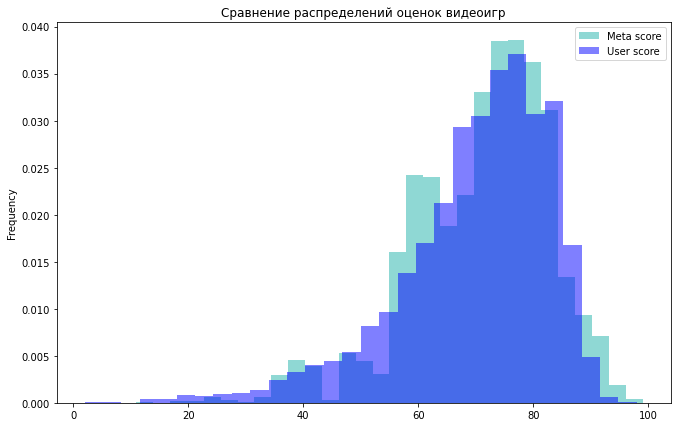

In [ ]:
df['meta_score'].plot(kind = 'hist', 
                     alpha = 0.5,
                     bins = 30,
                     density = True,
                     label = 'Meta score', 
                     color = 'lightseagreen')


df['user_score'].plot(kind = 'hist', 
                     alpha = 0.5,
                     bins = 30,
                     density = True,
                     label = 'User score',
                     color = 'blue')
plt.legend(loc = 'upper right')
plt.title('Сравнение распределений оценок видеоигр')

## Статистика оценок.

### Топ-10 видеоигр по оценкам критиков.

In [ ]:
crit = df[['game_name', 'meta_score']].sort_values(
    'meta_score', ascending = False).iloc[0:10].set_index('game_name')

In [ ]:
crit.style.background_gradient(cmap = 'PuBu', subset = 'meta_score')

,meta_score
game_name,
The Legend of Zelda: Ocarina of Time,99.000000
Super Mario Galaxy 2,97.000000
Metroid Prime,97.000000
Super Mario Odyssey,97.000000
Halo: Combat Evolved,97.000000
The House in Fata Morgana - Dreams of the Revenants Edition -,97.000000
NFL 2K1,97.000000
Super Mario Galaxy,97.000000
Grand Theft Auto V,96.800000


### Топ-10 видеоигр по оценкам пользователей.

In [ ]:
user = df[['game_name', 'user_score']].sort_values(
    'user_score', ascending = False).iloc[0:10].set_index('game_name')

In [ ]:
user.style.background_gradient(cmap = 'PuBu', subset = 'user_score')

,user_score
game_name,
After Burner Climax,98.000000
GrimGrimoire,97.000000
Metal Torrent,97.000000
The Witcher 3: Wild Hunt,92.700000
Suikoden II,92.000000
Half-Life: Alyx,92.000000
Warcraft III: The Frozen Throne,92.000000
The Last of Us Remastered,92.000000
Resident Evil (2002),92.000000


Ни одна игра не попала в 10 лучших по мнению одновременно и критиков, и пользователей.

### Топ-10 разработчиков по среднему арифметическому средних оценок их проектов среди критиков.

In [ ]:
topcdev = df[['developer', 'meta_score']].groupby(
    'developer').mean().sort_values('meta_score', ascending = False).iloc[0:10]

In [ ]:
topcount = df[['developer', 'game_name']].groupby(
    'developer').count().sort_values('game_name', ascending = False)

In [ ]:
topcritdev = topcdev.merge(
    topcount,
    left_on = 'developer',
    right_on = 'developer',
    how = 'left'
)

In [ ]:
topcritdev.style.background_gradient(cmap = 'PuBu')

,meta_score,game_name
developer,,
HuneX,97.000000,1
Monstars Inc.,95.000000,1
MPS Labs,94.000000,1
NexTech,94.000000,1
tobyfox,92.330000,1
Number None Inc.,92.000000,1
Tricky Pixels,92.000000,1
ZA/UM,91.250000,2
Wube Software LTD.,91.000000,1


### Топ-10 разработчиков по среднему арифметическому средних оценок их проектов среди пользователей.

In [ ]:
topudev = df[['developer', 'user_score']].groupby(
    'developer').mean().sort_values('user_score', ascending = False).iloc[0:10]

In [ ]:
topuserdev = topudev.merge(
    topcount,
    left_on = 'developer',
    right_on = 'developer',
    how = 'left'
)

In [ ]:
topuserdev.style.background_gradient(cmap = 'PuBu')

,user_score,game_name
developer,,
historia Inc,91.500000,1
Vanilla Ware,91.500000,2
Wube Software LTD.,91.000000,1
SimTex,90.000000,1
Team Cherry,90.000000,1
Capcom R&D Division 1,89.000000,1
Looking Glass Studios,89.000000,3
Black Mesa Modification Team,89.000000,1
Creature Labs,89.000000,1


Только одна студия попала в оба списка - "Wube Software LTD.".

Интересно, что и критики, и пользователи были единодушны - результат по обеим категориям составляет 91 балл.

## Статистика игровых платформ.

Определим, для каких платформ и в каком объёме выпускаются видеоигры.

Так как для каждого игрового тайтла данные по игровым платформам были объединены, нужно будет разбить их обратно.

In [ ]:
df.platform = df.platform.str.replace('\'', '', regex = False) \
.str.strip('[]')

In [ ]:
plat = df[['game_name', 'platform']]
plat.tail()

,game_name,platform
8826,kill.switch,"xbox, playstation-2"
8827,nail'd,pc
8828,oOo: Ascension,xbox-one
8829,uDraw Studio,wii
8830,xXx,game-boy-advance


In [ ]:
plat.platform = plat.platform.str.split(',')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rows = []
_ = plat.apply(lambda row: [rows.append([row['game_name'], x]) 
                         for x in row.platform], axis=1)
platforms = pd.DataFrame(rows, columns=plat.columns)

In [ ]:
platforms.platform = platforms.platform.str.strip()

In [ ]:
p = platforms.platform.value_counts().to_frame()
p.reset_index(inplace=True)
p.rename(columns={'index': 'platform', 'platform': 'games'}, inplace=True)

### Популярность игровых платформ у разработчиков

In [ ]:
p.iloc[:3]

,platform,games
0,pc,3108
1,playstation-4,1344
2,xbox-360,1015


In [ ]:
fig = px.scatter(p, x = 'games', y = 'platform',
	         size = 'games', color = 'games',
           color_continuous_scale = px.colors.sequential.Aggrnyl,
           hover_name = 'platform')
fig.show()

Персональный компьютер как игровая платформа наиболее популярен для разработчиков. 

Думаю, ПК так интересен в силу большой распространённости среди пользователей и возможности модернизации его компонентов.

### Топ кроссплатформенных игр

In [ ]:
platcount = platforms[['game_name','platform']].groupby(
    'game_name').count().sort_values('platform', ascending = False)

In [ ]:
platcount.loc[platcount.platform > 5].style.background_gradient(cmap = 'PuBu')

,platform
game_name,
Madden NFL 07,9
FIFA World Cup: Germany 2006,7
Tiger Woods PGA Tour 07,7
Cars,6
Spider-Man: Friend or Foe,6
NBA Live 06,6
Dragon's Dogma: Dark Arisen,6
Resident Evil 4,6
Pro Evolution Soccer 2008,6


## Статистика разработчиков

### Топ-10 разработчиков по количеству выпущенных ими игр.

In [ ]:
devs = df.developer.value_counts().iloc[0:10].to_frame()

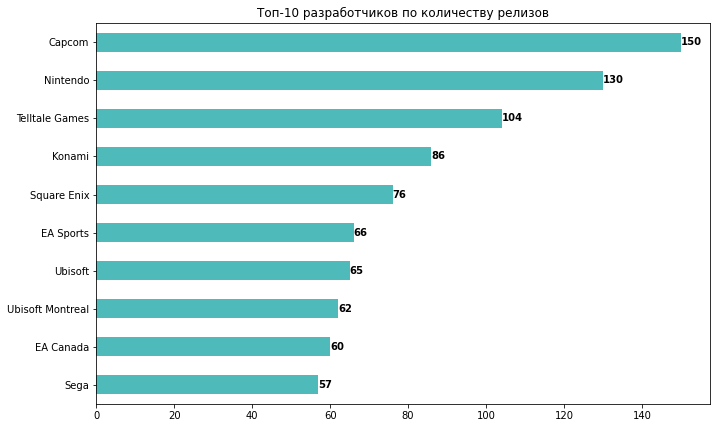

In [ ]:
dev = devs.plot(kind = 'barh', 
                    title = 'Топ-10 разработчиков по количеству релизов',
                    xlabel = '',
                    ylabel = 'Выпущено игр',
                    legend = False,
                  color = '#4EBABA')
for i, val in enumerate(devs.values):
    plt.text(val, i, int(val), ha='left', va='center', fontweight='bold')

dev.invert_yaxis()

### Топ-10 разработчиков по охвату платформ.

In [ ]:
devplat = df[['game_name','developer']]

In [ ]:
devplat = devplat.merge(
    platforms,
    left_on = 'game_name',
    right_on = 'game_name',
    how = 'inner'
)

In [ ]:
devplat = devplat[['developer','platform']]
devplat.drop_duplicates(inplace = True)
devplat = devplat['developer'].value_counts().iloc[:10].to_frame()

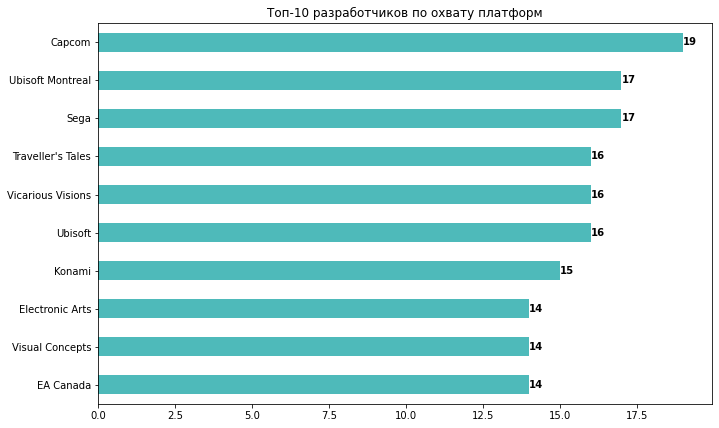

In [ ]:
devp = devplat.plot(kind = 'barh', 
                    title = 'Топ-10 разработчиков по охвату платформ',
                    xlabel = '',
                    ylabel = 'Платформ охвачено',
                    legend = False,
                  color = '#4EBABA')
for i, val in enumerate(devplat.values):
    plt.text(val, i, int(val), ha='left', va='center', fontweight='bold')

devp.invert_yaxis()

## Игровые жанры.

In [ ]:
gen = df.genre.value_counts().iloc[0:20].to_frame()
gen.style.background_gradient(cmap = 'PuBu', subset = 'genre')

,genre
"['Action', 'Platformer', '2D']",403
"['Role-Playing', 'Action RPG']",303
"['Action', 'General']",270
"['Adventure', 'General']",204
"['Action', 'Platformer', '3D']",175
"['Action Adventure', 'General']",162
"['Miscellaneous', 'Compilation']",130
"['Action', 'Fighting', '3D']",115
"['Action', 'Shooter', 'First-Person', 'Sci-Fi', 'Arcade']",112
"['Miscellaneous', 'Puzzle', 'General']",99


### Популярность отдельных жанров у разработчиков.

In [ ]:
genr = df[['game_name', 'genre']]

In [ ]:
genr.genre = genr.genre.str.replace('\'', '', regex = False)
genr.genre = genr.genre.str.strip('[]')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
genr.set_index(['game_name'])

,genre
game_name,
The Legend of Zelda: Ocarina of Time,"Action Adventure, Fantasy"
Super Mario Galaxy,"Action, Platformer, 3D"
Super Mario Galaxy 2,"Action, Platformer, 3D"
Metroid Prime,"Action, Shooter, First-Person, Sci-Fi"
Super Mario Odyssey,"Action, Platformer, 3D"
...,...
kill.switch,"Action, Shooter, Third-Person, Modern"
nail'd,"Driving, Racing, Arcade, Automobile"
oOo: Ascension,"Action, General, Arcade"


In [ ]:
genr = _.apply(lambda x: x.str.split(',').explode())

In [ ]:
genr.genre = genr.genre.str.strip()

In [ ]:
g = genr.genre.value_counts().iloc[0:20].to_frame()
g.style.background_gradient(cmap = 'PuBu', subset = 'genre')

,genre
Action,3125
General,2488
Action Adventure,1208
Shooter,1101
Role-Playing,1059
Miscellaneous,954
Strategy,934
Arcade,892
Adventure,823
First-Person,758


## Возрастной рейтинг.

In [ ]:
rati = df.rating.value_counts().to_frame()
rati.reset_index(inplace = True)
rati.style.background_gradient(cmap = 'PuBu', subset = 'rating')

,index,rating
0,rating_T,2636
1,rating_E,2377
2,rating_M,1535
3,NULL,1140
4,rating_E10+,1128
5,rating_RP,14
6,rating_AO,1


# 4.Рекомендации стейкхолдерам
* Оценки критиков и пользователей следует сделать частными для каждой платформы, на которой представлен игровой тайтл.

* При пополнении коллекции цифровых продуктов сервиса следует обратить внимание на:
  * тайтлы, поддерживаемые ПК (из-за большой распространённости платформы)
  * тайтлы, представленные на нескольких платформах (охват большой аудитории)
  * тайтлы разработчиков, лидирующих по охвату игровых платформ и количеству выпущенных игр 
  * тайтлы в наиболее часто встречающихся жанрах (такие жанры явно востребованы больше других)

* Требования к данным:
  * учесть различия возрастных рейтингов для пользователей сервиса из других стран.
  * данные о странах выпуска и датах выхода видеоигр могли бы значительно повысить ценность данных и помогли бы найти новые закономерности.


# 5.Создание функции рекомендаций

## Выбор оптимального типа рекомендательной системы
В данных по видеоиграм преимущественно содержатся характеристики игровых тайтлов, а именно: жанр, платформа, тип игры, разработчик, возрастной рейтинг. 

Исходя из этого, оптимальным вариантом реализации рекомендательной системы будет функция, составляющая рекомендацию на основе метаданных игровых тайтлов.


## Отбор ключевых слов для добавления в метаданные.

### Загружаю библиотеку SpaCy, необходимую для обработки текстовых описаний видеоигр.

In [ ]:
import spacy

Создам новый датафрейм на основе названий игр и их описаний.

In [ ]:
kw = df.copy()
kw = kw[['game_name','description']]

In [ ]:
kw.head()

,game_name,description
0,The Legend of Zelda: Ocarina of Time,"As a young boy, Link is tricked by Ganondorf, ..."
1,Super Mario Galaxy,[Metacritic's 2007 Wii Game of the Year] The u...
2,Super Mario Galaxy 2,"Super Mario Galaxy 2, the sequel to the galaxy..."
3,Metroid Prime,Samus returns in a new mission to unravel the ...
4,Super Mario Odyssey,New Evolution of Mario Sandbox-Style Gameplay....


### Нужно определить слова, используемые в описании наиболее и наименее часто.

50 наиболее часто употребляемых слов.

In [ ]:
more = pd.Series(' '.join(kw.description).split()).value_counts()[:50]
more

the         47531
and         33352
of          25809
to          23231
a           20083
in          13280
with         8950
your         8067
is           7135
you          6698
as           6218
on           5694
for          5569
new          5271
The          5026
from         4701
an           4652
that         4537
game         4118
their        3459
by           3417
or           3227
players      3187
will         3172
can          3059
are          2515
through      2419
into         2385
his          2314
all          2252
up           2235
world        2201
this         1943
be           1888
has          1863
-            1838
more         1765
have         1729
In           1640
they         1499
at           1478
one          1432
take         1389
it           1359
play         1334
unique       1306
out          1288
each         1250
who          1244
features     1227
dtype: int64

50 наименее часто употребляемых слов.

In [ ]:
less =  pd.Series(' '.join(kw 
         ['description']).split()).value_counts()[-50:]
less

“research          1
any.               1
Mii-like           1
Nationals          1
scooter)           1
(racing            1
Investigation.     1
simulations:       1
n°1                1
personal.          1
Seat’              1
Marks,             1
inhabit.           1
grit,              1
SPORTS,            1
COMPLETELY         1
MotionPlus™.       1
winner’s           1
Kayaking,          1
Fencing,           1
(Snowboarding),    1
(Skiing),          1
Springboard        1
Diving,            1
there:             1
Cutting!           1
(Volleyball,       1
Fencing)!          1
overlord.          1
’Hot               1
Hermann            1
chase.             1
Klempt             1
brawler,           1
Cannoli’s          1
Vinnie             1
straggler          1
Sapein             1
Liz                1
Cannoli,           1
Ock.               1
WINTER             1
arcade-oriented    1
Tarawa.            1
TVTV               1
Conlin             1
1941-1944,         1
Atoll.       

Одни и те же слова, написанные в разном регистре, считаются как разные. Также есть проблема с "засорённостью" знаками пунктуации.

### Очистка данных.

Чтобы исключить шумы в виде очень часто встречающихся слов, воспользуюсь готовым списком стоп-слов и добавлю к нему:

* слова игровой тематики, такие как "игра" или "игрок" 
* слова, попавшие в перечень часто используемых
* 'NULL', используемый как индикатор отсутствия значения в ячейке.

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
stop_words = nlp.Defaults.stop_words
my_stop_words = ['game', 'play', 'player', 'gameplay', 'feature', 'new', 'world', 'null']
stop_words = stop_words.union(my_stop_words)

Приведу слова, используемые в описаниях, к словарной форме с помощью лемматизации.

In [ ]:
kw['description'] = kw['description'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [ ]:
kw.head()

,game_name,description
0,The Legend of Zelda: Ocarina of Time,"as a young boy , Link be trick by Ganondorf , ..."
1,Super Mario Galaxy,[ Metacritic 's 2007 Wii Game of the Year ] th...
2,Super Mario Galaxy 2,"Super Mario Galaxy 2 , the sequel to the galax..."
3,Metroid Prime,samus return in a new mission to unravel the m...
4,Super Mario Odyssey,New Evolution of Mario Sandbox - Style Gamepla...


### Создам новый столбец, куда будут записаны ключевые слова.
* приведу все слова к нижнему регистру
* в процессе переноса отдельных слов из описания в новый столбец отфильтрую данные на наличие стоп-слов
* удалю числительные и знаки препинания
* представлю содержимое нового столбца в виде списка ключевых слов для каждого игрового тайтла
* столбец с описаниями мне больше не пригодится - исключу его

In [ ]:
kw['description'] = kw['description'].str.lower()

In [ ]:
kw['keywords'] = kw['description'].apply(
    lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

In [ ]:
kw['keywords'] = kw['keywords'].str.replace('[^a-z]', ' ',regex = True)

In [ ]:
kw['keywords'] = kw['keywords'].str.split()

In [ ]:
kw = kw[['game_name', 'keywords']]

In [ ]:
kw.head()

,game_name,keywords
0,The Legend of Zelda: Ocarina of Time,"[young, boy, link, trick, ganondorf, king, ger..."
1,Super Mario Galaxy,"[metacritic, wii, year, ultimate, nintendo, he..."
2,Super Mario Galaxy 2,"[super, mario, galaxy, sequel, galaxy, hop, or..."
3,Metroid Prime,"[samus, return, mission, unravel, mystery, rui..."
4,Super Mario Odyssey,"[evolution, mario, sandbox, style, mario, emba..."


Удалю появившиеся в результате лемматизации слов дубли.

In [ ]:
for i in range(0,8831):
  kw['keywords'][i] = list(dict.fromkeys(kw['keywords'][i]))

In [ ]:
kw.head()

,game_name,keywords
0,The Legend of Zelda: Ocarina of Time,"[young, boy, link, trick, ganondorf, king, ger..."
1,Super Mario Galaxy,"[metacritic, wii, year, ultimate, nintendo, he..."
2,Super Mario Galaxy 2,"[super, mario, galaxy, sequel, hop, original, ..."
3,Metroid Prime,"[samus, return, mission, unravel, mystery, rui..."
4,Super Mario Odyssey,"[evolution, mario, sandbox, style, embark, jou..."


В результате я получил ключевые слова, которые в дальнейшем включу в метаданные для использования в функции рекомендаций.

## Функция составления рекомендаций

### Логика работы функции рекомендаций.
* в качестве данных для ввода функция берёт название игрового тайтла.
* использует индекс этого тайтла, чтобы создать пронумерованный список, содержащий значения косинусного сходства векторов метаданных каждой игры с вектором тайтла.
* сортирует этот список по убыванию величины сходства
* функция игнорирует первое значение в списке, так как это значение "основной" игры, и оставляет следующие за ним 10 значений.
* у них берутся индексы, по которым функция возвращает названия игр, наиболее близких по косинусному сходству векторов их метаданных с вектором метаданных "основного" тайтла.

### Загружаю необходимые библиотеки.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

### Создаю копию начального датасета для работы по внесению изменений в данные.

In [ ]:
gms = df.copy()

Столбцы с описаниями и ссылками мне не понадобятся.

In [ ]:
gms = gms[['game_name', 'meta_score', 'user_score', 'platform',
           'developer', 'genre', 'type', 'rating']]

### Уберу из ячеек всё, что может помешать воспринимать данные, как уникальные:
 * например, Action Adventure нужно воспринимать как уникальный жанр, а не как жанры Action и Adventure. Необходимо убрать пробелы и лишние квадратные скобки.
 
 * для удобства представлю содержимое ячеек с метаданными в виде списков.

In [ ]:
gms.platform = gms.platform.str.split(',')

In [ ]:
gms.genre = gms.genre.str.replace(' ', '', regex = False)
gms.genre = gms.genre.str.replace(
    '\'', '', regex = False).str.strip('[]').str.split(',')

In [ ]:
gms.meta_score = gms.meta_score.astype(str).str.replace(
    ' ', '', regex = False).str.split(',')
gms.user_score = gms.user_score.astype(str).str.replace(
    ' ', '', regex = False).str.split(',')
gms.developer = gms.developer.str.replace(' ', '', regex = False).str.split(',')
gms.type = gms.type.str.replace(' ', '', regex = False).str.split(',')
gms.rating = gms.rating.str.replace(' ', '', regex = False).str.split(',')

In [ ]:
gms.head()

,game_name,meta_score,user_score,platform,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,[99.0],[91.0],[nintendo-64],[Nintendo],"[ActionAdventure, Fantasy]",[singleplayer],[rating_E]
1,Super Mario Galaxy,[97.0],[91.0],[wii],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E]
2,Super Mario Galaxy 2,[97.0],[91.0],[wii],[NintendoEADTokyo],"[Action, Platformer, 3D]",[singleplayer],[rating_E]
3,Metroid Prime,[97.0],[89.0],[gamecube],[RetroStudios],"[Action, Shooter, First-Person, Sci-Fi]",[singleplayer],[rating_T]
4,Super Mario Odyssey,[97.0],[89.0],[switch],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E10+]


### Присоединю к данным столбец с ключевыми словами

In [ ]:
gms = gms.merge(
    kw,
    left_on = 'game_name',
    right_on = 'game_name',
    how = 'inner'
)

In [ ]:
gms.head()

,game_name,meta_score,user_score,platform,developer,genre,type,rating,keywords
0,The Legend of Zelda: Ocarina of Time,[99.0],[91.0],[nintendo-64],[Nintendo],"[ActionAdventure, Fantasy]",[singleplayer],[rating_E],"[young, boy, link, trick, ganondorf, king, ger..."
1,Super Mario Galaxy,[97.0],[91.0],[wii],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E],"[metacritic, wii, year, ultimate, nintendo, he..."
2,Super Mario Galaxy 2,[97.0],[91.0],[wii],[NintendoEADTokyo],"[Action, Platformer, 3D]",[singleplayer],[rating_E],"[super, mario, galaxy, sequel, hop, original, ..."
3,Metroid Prime,[97.0],[89.0],[gamecube],[RetroStudios],"[Action, Shooter, First-Person, Sci-Fi]",[singleplayer],[rating_T],"[samus, return, mission, unravel, mystery, rui..."
4,Super Mario Odyssey,[97.0],[89.0],[switch],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E10+],"[evolution, mario, sandbox, style, embark, jou..."


### Создам столбец, который будет включать в себя все метаданные, имеющиеся у каждой видеоигры.

In [ ]:
gms['metadata'] = gms.apply(
    lambda x: ' '.join(x['meta_score']) +
    ' ' + ' '.join(x['user_score']) +
    ' ' + ' '.join(x['platform']) + 
    ' ' + ' '.join(x['developer']) + 
    ' ' + ' '.join(x['genre']) + 
    ' ' + ' '.join(x['type']) + 
    ' ' + ' '.join(x['rating']) + 
    ' ' + ' '.join(x['keywords']),
     axis = 1)

In [ ]:
gms.head()

,game_name,meta_score,user_score,platform,developer,genre,type,rating,keywords,metadata
0,The Legend of Zelda: Ocarina of Time,[99.0],[91.0],[nintendo-64],[Nintendo],"[ActionAdventure, Fantasy]",[singleplayer],[rating_E],"[young, boy, link, trick, ganondorf, king, ger...",99.0 91.0 nintendo-64 Nintendo ActionAdventure...
1,Super Mario Galaxy,[97.0],[91.0],[wii],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E],"[metacritic, wii, year, ultimate, nintendo, he...",97.0 91.0 wii Nintendo Action Platformer 3D si...
2,Super Mario Galaxy 2,[97.0],[91.0],[wii],[NintendoEADTokyo],"[Action, Platformer, 3D]",[singleplayer],[rating_E],"[super, mario, galaxy, sequel, hop, original, ...",97.0 91.0 wii NintendoEADTokyo Action Platform...
3,Metroid Prime,[97.0],[89.0],[gamecube],[RetroStudios],"[Action, Shooter, First-Person, Sci-Fi]",[singleplayer],[rating_T],"[samus, return, mission, unravel, mystery, rui...",97.0 89.0 gamecube RetroStudios Action Shooter...
4,Super Mario Odyssey,[97.0],[89.0],[switch],[Nintendo],"[Action, Platformer, 3D]",[singleplayer],[rating_E10+],"[evolution, mario, sandbox, style, embark, jou...",97.0 89.0 switch Nintendo Action Platformer 3D...


### Преобразую текстовое содержимое столбца "metadata" 
сначала в матрицу с числовыми данными векторов с помощью метода CountVectorizer, а затем в многомерный массив значений косинусного сходства этих векторов при помощи cosine_similarity.

In [ ]:
count_vec = CountVectorizer()
count_vec_matrix = count_vec.fit_transform(gms['metadata'])
count_vec_matrix

In [ ]:
cosine_sim_matrix = cosine_similarity(count_vec_matrix, count_vec_matrix)
cosine_sim_matrix

array([[1.        , 0.13900961, 0.13206764, ..., 0.02551552, 0.07319251,
        0.08333333],
       [0.13900961, 1.        , 0.36717341, ..., 0.06384424, 0.06104677,
        0.10425721],
       [0.13206764, 0.36717341, 1.        , ..., 0.05391639, 0.05155393,
        0.11005636],
       ...,
       [0.02551552, 0.06384424, 0.05391639, ..., 1.        , 0.05976143,
        0.07654655],
       [0.07319251, 0.06104677, 0.05155393, ..., 0.05976143, 1.        ,
        0.0243975 ],
       [0.08333333, 0.10425721, 0.11005636, ..., 0.07654655, 0.0243975 ,
        1.        ]])

## Реализация функции рекомендаций.

Создам структуру с индексами и названиями видеоигр для дальнейшего сопоставления полей данных.

In [ ]:
mapping = pd.Series(gms.index,index = gms['game_name'])
mapping

game_name
The Legend of Zelda: Ocarina of Time       0
Super Mario Galaxy                         1
Super Mario Galaxy 2                       2
Metroid Prime                              3
Super Mario Odyssey                        4
                                        ... 
kill.switch                             8826
nail'd                                  8827
oOo: Ascension                          8828
uDraw Studio                            8829
xXx                                     8830
Length: 8831, dtype: int64

В качестве видеоигры для реализации и последующей проверки работоспособности функции возьму игру “Batman: Arkham City”.

In [ ]:
df.loc[df.game_name == 'Batman: Arkham City']

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
4554,Batman: Arkham City,93.67,87.3,"playstation-3, xbox-360, pc","Developed by Rocksteady Studios, Batman: Arkha...",https://www.metacritic.com/game/playstation-3/...,Rocksteady Studios,"['Action Adventure', 'Fantasy', 'Open-World']",singleplayer,rating_T


In [ ]:
game_input = 'Batman: Arkham City'

Сначала получу индекс игрового тайтла

In [ ]:
game_index = mapping[game_input]

Далее создам пронумерованный список значений косинусного сходства векторов метаданных каждой игры.

Отсортирую этот список по убыванию величины сходства, игнорируя первое значение в списке.

Следующие 10 значений будут использованы для рекомендации

In [ ]:
similarity_score = list(enumerate(cosine_sim_matrix[game_index]))
similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
similarity_score = similarity_score[1:11]
similarity_score

[(4559, 0.4627381113705622),
 (4555, 0.4322030794290975),
 (4556, 0.3782460108307676),
 (2358, 0.32639560491693337),
 (4553, 0.31520500902563964),
 (460, 0.251259453814803),
 (6233, 0.23652495839563306),
 (7989, 0.23652495839563306),
 (4557, 0.22591299788996194),
 (1908, 0.2247332874877473)]

На основе индексов из сформированного списка можно получить названия 10 игр, наиболее близких к "основному" тайтлу.

In [ ]:
game_indexes = [i[0] for i in similarity_score]
df['game_name'].iloc[game_indexes]

4559                        Batman: Return to Arkham
4555           Batman: Arkham City - Armored Edition
4556                          Batman: Arkham Origins
2358    Batman: Arkham City - Harley Quinn's Revenge
4553                           Batman: Arkham Asylum
460               Marvel's Spider-Man: Miles Morales
6233                        LEGO Marvel Super Heroes
7989                        The Amazing Spider-Man 2
4557       Batman: Arkham Origins - Cold, Cold Heart
1908                               Batman: Arkham VR
Name: game_name, dtype: object

Теперь заверну все проделанные шаги в функцию и дополню вывод полезной информацией о рекомендуемых играх.

In [ ]:
def recommendation(game_input):   
  game_index = mapping[game_input]
  similarity_score = list(enumerate(cosine_sim_matrix[game_index]))
  similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
  similarity_score = similarity_score[1:11]
  game_indexes = [i[0] for i in similarity_score]
  print(f"Рекомендация на основе тайтла составлена:\n")
  return df[['game_name',
             'developer',
             'platform',
             'meta_score',
             'user_score']].iloc[game_indexes]

### Результат работы функции рекомендаций.

In [ ]:
recommendation(input('Введите игровой тайтл для поиска рекомендаций:\n'))

Введите игровой тайтл для поиска рекомендаций:
Batman: Arkham City
Рекомендация на основе тайтла составлена:



,game_name,developer,platform,meta_score,user_score
4559,Batman: Return to Arkham,Rocksteady Studios,playstation-4,73.00,84.0
4555,Batman: Arkham City - Armored Edition,Rocksteady Studios,wii-u,85.00,85.0
4556,Batman: Arkham Origins,WB Games Montreal,"playstation-3, pc, xbox-360",74.67,76.3
2358,Batman: Arkham City - Harley Quinn's Revenge,Rocksteady Studios,xbox-360,72.00,68.0
4553,Batman: Arkham Asylum,Rocksteady Studios,"xbox-360, pc, playstation-3",91.33,87.0
460,Marvel's Spider-Man: Miles Morales,Insomniac Games,playstation-4,84.00,76.0
6233,LEGO Marvel Super Heroes,TT Games,"playstation-4, xbox-360, pc",80.33,78.7
7989,The Amazing Spider-Man 2,Beenox,"pc, xbox-360",56.00,59.0
4557,"Batman: Arkham Origins - Cold, Cold Heart",WB Games Montreal,xbox-360,71.00,80.0
1908,Batman: Arkham VR,Rocksteady Studios,playstation-4,74.00,72.0


# 6.Итоги
В результате проделанной работы был проведён анализ имеющихся данных, показавший ряд важных особенностей. Их рекомендуется учитывать при улучшении качества работы сервиса, который занимается распространением видеоигр.

На основе набора данных была реализована функция видеоигровых рекомендаций, работающая на принципе косинусного сходства числовых значений векторов метаданных видеоигр. 

Реализованная функция отвечает поставленным задачам и выдаёт корректные рекомендации, основанные на схожести метаданных. Интеграция функции в работу видеоигрового сервиса поможет увеличить количество, и значительно улучшить качество предоставляемых пользователям сервиса возможностей.